**All Libraries Import**

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


**Test Data Read**

In [ ]:
train_df=pd.read_csv("/content/test-Minimum-Error-Rate-Classifier.txt",sep="," ,names=["x1","x2"])
train_set=np.array(train_df)




**Multivariate Gaussian Function**

In [ ]:
def multivariate_gaussian(pos, miu, Sigma):
    n = miu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-miu, Sigma_inv, pos-miu)
    return np.exp(-fac / 2) / N



**All Variables**

In [ ]:
class1 = []
class2 = []
class1_X=[]
class1_Y=[]
class2_X=[]
class2_Y=[]
pri_omega_one=0.5
pri_omega_two=0.5
miu_one=np.array([0,0])
miu_two=np.array([2,2])
sigma_one=np.array([[.25,.3],[.3,1]])
sigma_two=np.array([[.5,0],[0,.5]])
D=2

**Class Separation**

In [ ]:
for i in range(0,len(train_set)):


  term_one_1=pow((2*math.pi),D)

  term_one_2=np.linalg.det(sigma_one)

  term_one_one=1/math.sqrt(term_one_1 * term_one_2)

  term_one_two = -0.5 * np.dot(np.transpose(np.subtract(train_set[i] , miu_one) ), np.dot(np.linalg.inv(sigma_one), (np.subtract(train_set[i] , miu_one)) ))

  normal_one=term_one_one*np.exp(term_one_two)


  term_two_1=pow((2*math.pi),D)

  term_two_2=np.linalg.det(sigma_two)

  term_two_one=1/math.sqrt(term_two_1* term_two_2)

  term_two_two = -0.5 * np.dot(np.transpose(np.subtract(train_set[i] , miu_two) ), np.dot(np.linalg.inv(sigma_two), (np.subtract(train_set[i] , miu_two)) ))

  normal_two=term_two_one*np.exp(term_two_two)


  post1=normal_one*pri_omega_one
  post2=normal_two*pri_omega_two
  if (post1 > post2) :
    class1.append([train_set[i][0],train_set[i][1],1])

  else :
     class2.append([train_set[i][0],train_set[i][1],2])


  

**Class Data point Separation**

In [ ]:

for i in range(len(class1)):
  class1_X.append(class1[i][0])
  class1_Y.append(class1[i][1])
for i in range(len(class2)):
  class2_X.append(class2[i][0])
  class2_Y.append(class2[i][1])

**Class Plot**

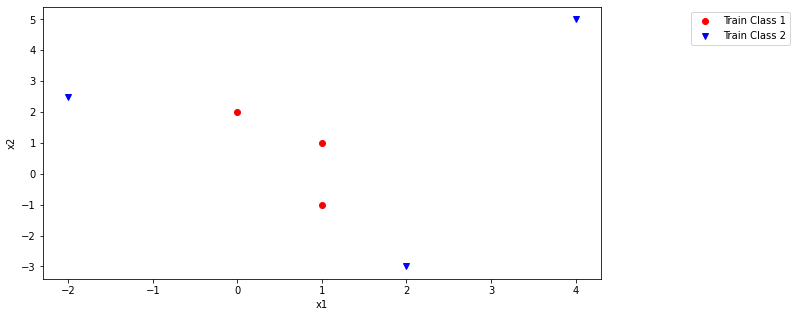

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(class1_X,class1_Y,'ro' , label = 'Train Class 1')
plt.plot(class2_X,class2_Y,'bv' , label = 'Train Class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc="upper center",bbox_to_anchor=(1.25, 1))
plt.show()

**3D Plot**

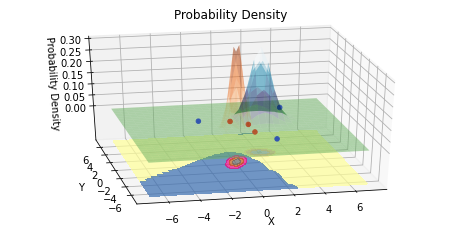

In [ ]:
X = np.linspace(-7, 7, 32)
Y = np.linspace(-7, 7, 32)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
Z = multivariate_gaussian(pos, miu_one, sigma_one)
Z1 = multivariate_gaussian(pos, miu_two, sigma_two)
db=(Z-Z1)
fig = plt.figure()
ax = fig.gca(projection='3d')
fig.set_figheight(4)
fig.set_figwidth(8)
z=0
ax.scatter(class1_X,class1_Y,color='red',alpha=1)
ax.scatter(class2_X,class2_Y,color='blue',alpha=1)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=1, antialiased=True,
                cmap=cm.Oranges,alpha=.3)
ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, linewidth=1, antialiased=True,
                cmap=cm.ocean,alpha=.3)
ax.contourf(X, Y, db, zdir='z', offset=-.15,cmap=cm.Accent,alpha=0.7)
ax.set_title('Probability Density')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
ax.set_zlim(-0.15,.2)
ax.set_zticks(np.linspace(.30,0.0,7))
ax.view_init(30, -102)
plt.show()


